In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import json
from scipy.interpolate import griddata
from collections import deque
from itertools import product
# from multiprocessing import Pool, cpu_count
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import splprep, splev
from functools import partial
from pathos.multiprocessing import ProcessingPool as Pool
from scipy.stats import norm
from matplotlib.backends.backend_pdf import PdfPages
import pdb
import functools
import pickle
import matplotlib.gridspec as gridspec
from PIL import Image
import copy
from utils import SpaceScan

from matsim import *

plt.style.use('pcb')

In [5]:
hh_data_root = 'HH experiments/data/'
hh_data_root = 'data/'
hh_res = {}
hh_names = ['clas','dynt','musc']

for name in hh_names:
#     filename = hh_data_root + f'res_{name}_area.pickle'
    filename = hh_data_root + f'hh_{name}_refined.pickle'

    with open(filename, 'rb') as file:
        hh_res[name] = pickle.load(file)
        
    for c, gr in hh_res[name].items():
        hh_res[name][c] = np.array(gr)

# lif_data_root = 'LIF/data/'
lif_data_root = 'data/'
lif_res = {}
lif_names = ['lif','dlif','mlif']
lif_names = ['clas','dynt','musc']

for name in lif_names:
#     filename = lif_data_root + f'res_{name}_area.pickle'
    filename = hh_data_root + f'glif_{name}_refined.pickle'

    with open(filename, 'rb') as file:
        lif_res[name] = pickle.load(file)
        
    for c, gr in lif_res[name].items():
        lif_res[name][c] = np.array(gr)

In [6]:
def plot_neuron(ss, scan, farr, ylim):
    gs_inner = ss.subgridspec(2, 2, width_ratios=[9, 1], wspace=0.05)
    ax_ln = fig.add_subplot(gs_inner[0,0])
    ax_hm = fig.add_subplot(gs_inner[1,0])
    ax_cb = fig.add_subplot(gs_inner[1,1])
    axes = [ax_ln, ax_hm, ax_cb]
    
    cs = scan.plot_heatmap(ax_hm)
    cb = fig.colorbar(cs, cax=ax_cb, ticks=[i*0.2 for i in range(14)])
    
    for i,f in enumerate(farr):
        scan.plot_line(f, ax_ln, c=f'C{i}', lw=1.3, label=f'{f:.1f}')
    ax_ln.set_xlim(1,100)
    ax_ln.set_ylim(ylim)
    ax_ln.set_xscale('log')
    
    return axes

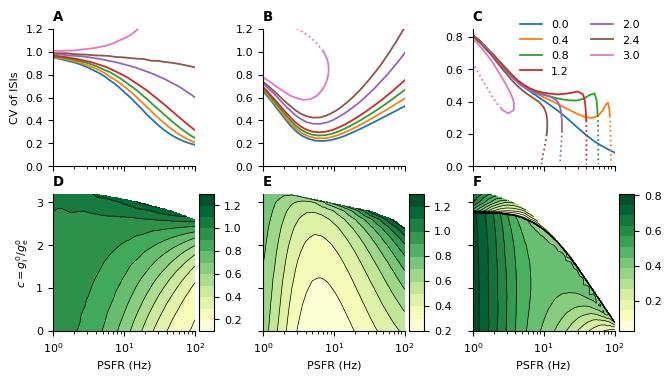

In [7]:
fig = plt.figure(figsize=(7.5, 4))
gs = fig.add_gridspec(1, 3, wspace=0.3)

lif_ylims = {
    'clas': (0, 1.2),
    'dynt': (0, 0.85),
    'musc': (0, 1.2),
}

# farr_lif = [0, 0.15, 0.35, 0.5, 0.7, 0.8, 0.85, 0.9]
farr_lif = [0, 0.4, 0.8, 1.2, 2, 2.4, 3]

names_lif = ['clas', 'musc', 'dynt']
names_letters = {
    'clas': ['A','D'],
    'musc': ['B','E'],
    'dynt': ['C','F']
}

for i, name in enumerate(names_lif):#(name, res) in enumerate(lif_res.items()):
    res = lif_res[name]
    scan = SpaceScan(res, fill=False, dlif=(name=='dynt'), q=1)
#     scan = SpaceScan(res, fill=(name=='dlif'))
    axes = plot_neuron(gs[i], scan, farr_lif, lif_ylims[name])
    if i!=0:
        axes[1].set_yticklabels([])
    if i==0:
        axes[0].set_ylabel('CV of ISIs')
        axes[1].set_ylabel(r'$c=g_\mathrm{i}^0 / g_\mathrm{e}^0$')
    if i==2:
        axes[0].legend(ncol=2, bbox_to_anchor=(0.3, 1.1), loc='upper left', borderaxespad=0., frameon=False)
    axes[0].set_xticklabels([])
    letters = names_letters[name]
    axes[0].set_title(letters[0], fontweight='bold', loc='left')
    axes[1].set_title(letters[1], fontweight='bold', loc='left')
    
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

plt.savefig('img/glif.png')

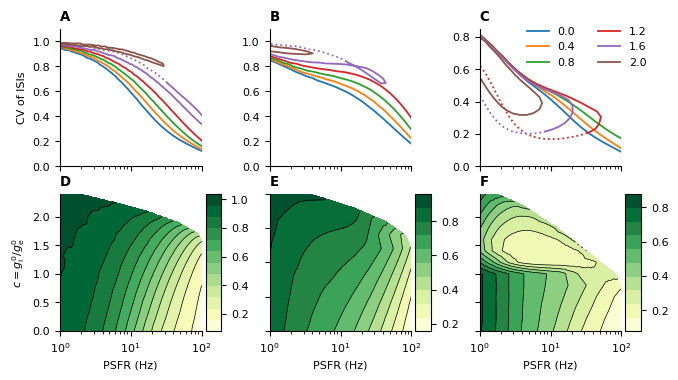

In [8]:
fig = plt.figure(figsize=(7.5, 4))
gs = fig.add_gridspec(1, 3, wspace=0.3)

hh_ylims = {
    'clas': (0, 1.1),
    'dynt': (0, 0.85),
    'musc': (0, 1.1)
}

farr_hh = [0, 0.15, 0.35, 0.5, 0.6]
farr_hh = [0, 0.4, 0.8, 1.2, 1.6, 2]

names_hh = ['clas', 'musc', 'dynt']
names_letters = {
    'clas': ['A','D'],
    'musc': ['B','E'],
    'dynt': ['C','F']
}

for i, name in enumerate(names_hh):#(name, res) in enumerate(lif_res.items()):
    res = hh_res[name]
    scan = SpaceScan(res, fill=False, q=1)
    axes = plot_neuron(gs[i], scan, farr_hh, hh_ylims[name])
    if i!=0:
        axes[1].set_yticklabels([])
    if i==0:
        axes[0].set_ylabel('CV of ISIs')
        axes[1].set_ylabel(r'$c=g_\mathrm{i}^0 / g_\mathrm{e}^0$')
    if i==2:
        axes[0].legend(ncol=2, bbox_to_anchor=(0.3, 1.05), loc='upper left', borderaxespad=0., frameon=False)
    axes[0].set_xticklabels([])
    letters = names_letters[name]
    axes[0].set_title(letters[0], fontweight='bold', loc='left')
    axes[1].set_title(letters[1], fontweight='bold', loc='left')
    
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

plt.savefig('img/hh_all.png')